In [12]:
import os
os.chdir('/home/xinglong/git_local/ssm-jax')
import jax
jax.config.update('jax_platform_name', 'cpu')

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import jax.numpy as jnp
import jax.random as jr
import ssm_jax.structural_time_series.models.structural_time_series as sts

### Load the date set

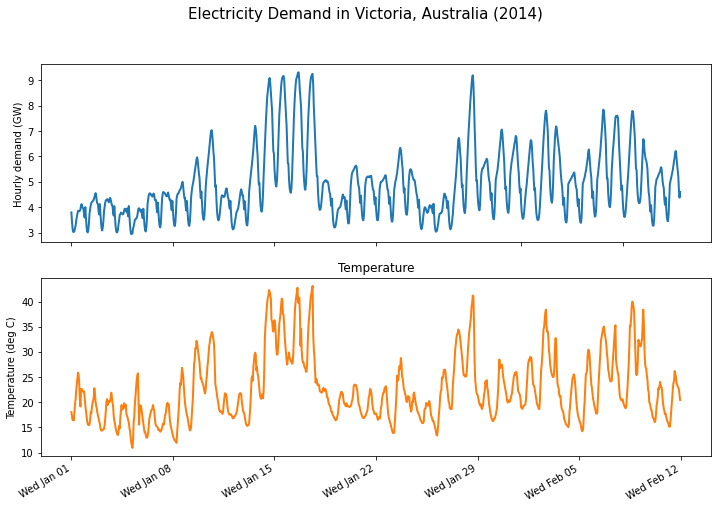

In [11]:
# Victoria electricity demand dataset, as presented at
# https://otexts.com/fpp2/scatterplots.html
# and downloaded from https://github.com/robjhyndman/fpp2-package/blob/master/data/elecdaily.rda
# This series contains the first eight weeks (starting Jan 1). The original
# dataset was half-hourly data; here we've downsampled to hourly data by taking
# every other timestep.
from os import closerange


demand_dates = np.arange('2014-01-01', '2014-02-26', dtype='datetime64[h]')
demand_loc = mdates.WeekdayLocator(byweekday=mdates.WE)
demand_fmt = mdates.DateFormatter('%a %b %d')

demand = np.array("3.794,3.418,3.152,3.026,3.022,3.055,3.180,3.276,3.467,3.620,3.730,3.858,3.851,3.839,3.861,3.912,4.082,4.118,4.011,3.965,3.932,3.693,3.585,4.001,3.623,3.249,3.047,3.004,3.104,3.361,3.749,3.910,4.075,4.165,4.202,4.225,4.265,4.301,4.381,4.484,4.552,4.440,4.233,4.145,4.116,3.831,3.712,4.121,3.764,3.394,3.159,3.081,3.216,3.468,3.838,4.012,4.183,4.269,4.280,4.310,4.315,4.233,4.188,4.263,4.370,4.308,4.182,4.075,4.057,3.791,3.667,4.036,3.636,3.283,3.073,3.003,3.023,3.113,3.335,3.484,3.697,3.723,3.786,3.763,3.748,3.714,3.737,3.828,3.937,3.929,3.877,3.829,3.950,3.756,3.638,4.045,3.682,3.283,3.036,2.933,2.956,2.959,3.157,3.236,3.370,3.493,3.516,3.555,3.570,3.656,3.792,3.950,3.953,3.926,3.849,3.813,3.891,3.683,3.562,3.936,3.602,3.271,3.085,3.041,3.201,3.570,4.123,4.307,4.481,4.533,4.545,4.524,4.470,4.457,4.418,4.453,4.539,4.473,4.301,4.260,4.276,3.958,3.796,4.180,3.843,3.465,3.246,3.203,3.360,3.808,4.328,4.509,4.598,4.562,4.566,4.532,4.477,4.442,4.424,4.486,4.579,4.466,4.338,4.270,4.296,4.034,3.877,4.246,3.883,3.520,3.306,3.252,3.387,3.784,4.335,4.465,4.529,4.536,4.589,4.660,4.691,4.747,4.819,4.950,4.994,4.798,4.540,4.352,4.370,4.047,3.870,4.245,3.848,3.509,3.302,3.258,3.419,3.809,4.363,4.605,4.793,4.908,5.040,5.204,5.358,5.538,5.708,5.888,5.966,5.817,5.571,5.321,5.141,4.686,4.367,4.618,4.158,3.771,3.555,3.497,3.646,4.053,4.687,5.052,5.342,5.586,5.808,6.038,6.296,6.548,6.787,6.982,7.035,6.855,6.561,6.181,5.899,5.304,4.795,4.862,4.264,3.820,3.588,3.481,3.514,3.632,3.857,4.116,4.375,4.462,4.460,4.422,4.398,4.407,4.480,4.621,4.732,4.735,4.572,4.385,4.323,4.069,3.940,4.247,3.821,3.416,3.220,3.124,3.132,3.181,3.337,3.469,3.668,3.788,3.834,3.894,3.964,4.109,4.275,4.472,4.623,4.703,4.594,4.447,4.459,4.137,3.913,4.231,3.833,3.475,3.302,3.279,3.519,3.975,4.600,4.864,5.104,5.308,5.542,5.759,6.005,6.285,6.617,6.993,7.207,7.095,6.839,6.387,6.048,5.433,4.904,4.959,4.425,4.053,3.843,3.823,4.017,4.521,5.229,5.802,6.449,6.975,7.506,7.973,8.359,8.596,8.794,9.030,9.090,8.885,8.525,8.147,7.797,6.938,6.215,6.123,5.495,5.140,4.896,4.812,5.024,5.536,6.293,7.000,7.633,8.030,8.459,8.768,9.000,9.113,9.155,9.173,9.039,8.606,8.095,7.617,7.208,6.448,5.740,5.718,5.106,4.763,4.610,4.566,4.737,5.204,5.988,6.698,7.438,8.040,8.484,8.837,9.052,9.114,9.214,9.307,9.313,9.006,8.556,8.275,7.911,7.077,6.348,6.175,5.455,5.041,4.759,4.683,4.908,5.411,6.199,6.923,7.593,8.090,8.497,8.843,9.058,9.159,9.231,9.253,8.852,7.994,7.388,6.735,6.264,5.690,5.227,5.220,4.593,4.213,3.984,3.891,3.919,4.031,4.287,4.558,4.872,4.963,5.004,5.017,5.057,5.064,5.000,5.023,5.007,4.923,4.740,4.586,4.517,4.236,4.055,4.337,3.848,3.473,3.273,3.198,3.204,3.252,3.404,3.560,3.767,3.896,3.934,3.972,3.985,4.032,4.122,4.239,4.389,4.499,4.406,4.356,4.396,4.106,3.914,4.265,3.862,3.546,3.360,3.359,3.649,4.180,4.813,5.086,5.301,5.384,5.434,5.470,5.529,5.582,5.618,5.636,5.561,5.291,5.000,4.840,4.767,4.364,4.160,4.452,4.011,3.673,3.503,3.483,3.695,4.213,4.810,5.028,5.149,5.182,5.208,5.179,5.190,5.220,5.202,5.216,5.232,5.019,4.828,4.686,4.657,4.304,4.106,4.389,3.955,3.643,3.489,3.479,3.695,4.187,4.732,4.898,4.997,5.001,5.022,5.052,5.094,5.143,5.178,5.250,5.255,5.075,4.867,4.691,4.665,4.352,4.121,4.391,3.966,3.615,3.437,3.430,3.666,4.149,4.674,4.851,5.011,5.105,5.242,5.378,5.576,5.790,6.030,6.254,6.340,6.253,6.039,5.736,5.490,4.936,4.580,4.742,4.230,3.895,3.712,3.700,3.906,4.364,4.962,5.261,5.463,5.495,5.477,5.394,5.250,5.159,5.081,5.083,5.038,4.857,4.643,4.526,4.428,4.141,3.975,4.290,3.809,3.423,3.217,3.132,3.192,3.343,3.606,3.803,3.963,3.998,3.962,3.894,3.814,3.776,3.808,3.914,4.033,4.079,4.027,3.974,4.057,3.859,3.759,4.132,3.716,3.325,3.111,3.030,3.046,3.096,3.254,3.390,3.606,3.718,3.755,3.768,3.768,3.834,3.957,4.199,4.393,4.532,4.516,4.380,4.390,4.142,3.954,4.233,3.795,3.425,3.209,3.124,3.177,3.288,3.498,3.715,4.092,4.383,4.644,4.909,5.184,5.518,5.889,6.288,6.643,6.729,6.567,6.179,5.903,5.278,4.788,4.885,4.363,4.011,3.823,3.762,3.998,4.598,5.349,5.898,6.487,6.941,7.381,7.796,8.185,8.522,8.825,9.103,9.198,8.889,8.174,7.214,6.481,5.611,5.026,5.052,4.484,4.148,3.955,3.873,4.060,4.626,5.272,5.441,5.535,5.534,5.610,5.671,5.724,5.793,5.838,5.908,5.868,5.574,5.276,5.065,4.976,4.554,4.282,4.547,4.053,3.720,3.536,3.524,3.792,4.420,5.075,5.208,5.344,5.482,5.701,5.936,6.210,6.462,6.683,6.979,7.059,6.893,6.535,6.121,5.797,5.152,4.705,4.805,4.272,3.975,3.805,3.775,3.996,4.535,5.275,5.509,5.730,5.870,6.034,6.175,6.340,6.500,6.603,6.804,6.787,6.460,6.043,5.627,5.367,4.866,4.575,4.728,4.157,3.795,3.607,3.537,3.596,3.803,4.125,4.398,4.660,4.853,5.115,5.412,5.669,5.930,6.216,6.466,6.641,6.605,6.316,5.821,5.520,5.016,4.657,4.746,4.197,3.823,3.613,3.505,3.488,3.532,3.716,4.011,4.421,4.836,5.296,5.766,6.233,6.646,7.011,7.380,7.660,7.804,7.691,7.364,7.019,6.260,5.545,5.437,4.806,4.457,4.235,4.172,4.396,5.002,5.817,6.266,6.732,7.049,7.184,7.085,6.798,6.632,6.408,6.218,5.968,5.544,5.217,4.964,4.758,4.328,4.074,4.367,3.883,3.536,3.404,3.396,3.624,4.271,4.916,4.953,5.016,5.048,5.106,5.124,5.200,5.244,5.242,5.341,5.368,5.166,4.910,4.762,4.700,4.276,4.035,4.318,3.858,3.550,3.399,3.382,3.590,4.261,4.937,4.994,5.094,5.168,5.303,5.410,5.571,5.740,5.900,6.177,6.274,6.039,5.700,5.389,5.192,4.672,4.359,4.614,4.118,3.805,3.627,3.646,3.882,4.470,5.106,5.274,5.507,5.711,5.950,6.200,6.527,6.884,7.196,7.615,7.845,7.759,7.437,7.059,6.584,5.742,5.125,5.139,4.564,4.218,4.025,4.000,4.245,4.783,5.504,5.920,6.271,6.549,6.894,7.231,7.535,7.597,7.562,7.609,7.534,7.118,6.448,5.963,5.565,5.005,4.666,4.850,4.302,3.905,3.678,3.610,3.672,3.869,4.204,4.541,4.944,5.265,5.651,6.090,6.547,6.935,7.318,7.625,7.793,7.760,7.510,7.145,6.805,6.103,5.520,5.462,4.824,4.444,4.237,4.157,4.164,4.275,4.545,5.033,5.594,6.176,6.681,6.628,6.238,6.039,5.897,5.832,5.701,5.483,4.949,4.589,4.407,4.027,3.820,4.075,3.650,3.388,3.271,3.268,3.498,4.086,4.800,4.933,5.102,5.126,5.194,5.260,5.319,5.364,5.419,5.559,5.568,5.332,5.027,4.864,4.738,4.303,4.093,4.379,3.952,3.632,3.461,3.446,3.732,4.294,4.911,5.021,5.138,5.223,5.348,5.479,5.661,5.832,5.966,6.178,6.212,5.949,5.640,5.449,5.213,4.678,4.376,4.601,4.147,3.815,3.610,3.605,3.879,4.468,5.090,5.226,5.406,5.561,5.740,5.899,6.095,6.272,6.402,6.610,6.585,6.265,5.925,5.747,5.497,4.932,4.580,4.763,4.298,4.026,3.871,3.827,4.065,4.643,5.317,5.494,5.685,5.814,5.912,5.999,6.097,6.176,6.136,6.131,6.049,5.796,5.532,5.475,5.254,4.742,4.453,4.660,4.176,3.895,3.726,3.717,3.910,4.479,5.135,5.306,5.520,5.672,5.737,5.785,5.829,5.893,5.892,5.921,5.817,5.557,5.304,5.234,5.074,4.656,4.396,4.599,4.064,3.749,3.560,3.475,3.552,3.783,4.045,4.258,4.539,4.762,4.938,5.049,5.037,5.066,5.151,5.197,5.201,5.132,4.908,4.725,4.568,4.222,3.939,4.215,3.741,3.380,3.174,3.076,3.071,3.172,3.328,3.427,3.603,3.738,3.765,3.777,3.705,3.690,3.742,3.859,4.032,4.113,4.032,4.066,4.011,3.712,3.530,3.905,3.556,3.283,3.136,3.146,3.400,4.009,4.717,4.827,4.909,4.973,5.036,5.079,5.160,5.228,5.241,5.343,5.350,5.184,4.941,4.797,4.615,4.160,3.904,4.213,3.810,3.528,3.369,3.381,3.609,4.178,4.861,4.918,5.006,5.102,5.239,5.385,5.528,5.724,5.845,6.048,6.097,5.838,5.507,5.267,5.003,4.462,4.184,4.431,3.969,3.660,3.480,3.470,3.693,4.313,4.955,5.083,5.251,5.268,5.293,5.285,5.308,5.349,5.322,5.328,5.151,4.975,4.741,4.678,4.458,4.056,3.868,4.226,3.799,3.428,3.253,3.228,3.452,4.040,4.726,4.709,4.721,4.741,4.846,4.864,4.868,4.836,4.799,4.890,4.946,4.800,4.646,4.693,4.546,4.117,3.897,4.259,3.893,3.505,3.341,3.334,3.623,4.240,4.925,4.986,5.028,4.987,4.984,4.975,4.912,4.833,4.686,4.710,4.718,4.577,4.454,4.532,4.407,4.064,3.883,4.221,3.792,3.445,3.261,3.221,3.295,3.521,3.804,4.038,4.200,4.226,4.198,4.182,4.078,4.018,4.002,4.066,4.158,4.154,4.084,4.104,4.001,3.773,3.700,4.078,3.702,3.349,3.143,3.052,3.070,3.181,3.327,3.440,3.616,3.678,3.694,3.710,3.706,3.764,3.852,4.009,4.202,4.323,4.249,4.275,4.162,3.848,3.706,4.060,3.703,3.401,3.251,3.239,3.455,4.041,4.743,4.815,4.916,4.931,4.966,5.063,5.218,5.381,5.458,5.550,5.566,5.376,5.104,5.022,4.793,4.335,4.108,4.410,4.008,3.666,3.497,3.464,3.698,4.333,4.998,5.094,5.272,5.459,5.648,5.853,6.062,6.258,6.236,6.226,5.957,5.455,5.066,4.968,4.742,4.304,4.105,4.410".split(",")).astype(np.float32)

temperature = np.array("18.050,17.200,16.450,16.650,16.400,17.950,19.700,20.600,22.350,23.700,24.800,25.900,25.300,23.650,20.700,19.150,22.650,22.650,22.400,22.150,22.050,22.150,21.000,19.500,18.450,17.250,16.300,15.700,15.500,15.450,15.650,16.500,18.100,17.800,19.100,19.850,20.300,21.050,22.800,21.650,20.150,19.300,18.750,17.900,17.350,16.850,16.350,15.700,14.950,14.500,14.350,14.450,14.600,14.600,14.700,15.450,16.700,18.300,20.100,20.650,19.450,20.200,20.250,20.050,20.250,20.950,21.900,21.000,19.900,19.250,17.300,16.300,15.800,15.000,14.400,14.050,13.650,13.500,14.150,15.300,14.800,17.050,18.350,19.450,18.550,18.650,18.850,19.800,19.650,18.900,19.500,17.700,17.350,16.950,16.400,15.950,14.900,14.250,13.050,12.000,11.500,10.950,12.300,16.100,17.100,19.600,21.100,22.600,24.350,25.250,25.750,20.350,15.550,18.300,19.400,19.250,18.550,17.700,16.750,15.800,14.900,14.050,14.100,13.500,13.000,12.950,13.300,13.900,15.400,16.750,17.300,17.750,18.400,18.500,18.800,19.450,18.750,18.400,16.950,15.800,15.350,15.250,15.150,14.900,14.500,14.600,14.400,14.150,14.300,14.500,14.950,15.550,15.800,15.550,16.450,17.500,17.700,18.750,19.600,19.900,19.350,19.550,17.900,16.400,15.550,14.900,14.400,13.950,13.300,12.950,12.650,12.450,12.350,12.150,11.950,14.150,15.850,17.750,19.450,22.150,23.850,23.450,24.950,26.850,26.100,25.150,23.250,21.300,19.850,18.900,18.250,17.450,17.100,16.400,15.550,15.050,14.400,14.550,15.150,17.050,18.850,20.850,24.250,27.700,28.400,30.750,30.700,32.200,31.750,30.650,29.750,28.850,27.850,25.950,24.700,24.850,24.050,23.850,23.500,22.950,22.200,21.750,22.350,24.050,25.150,27.100,28.050,29.750,31.250,31.900,32.950,33.150,33.950,33.850,33.250,32.500,31.500,28.300,23.900,22.900,22.300,21.250,20.500,19.850,18.850,18.300,18.100,18.200,18.150,18.000,17.700,18.250,19.700,20.750,21.800,21.500,21.600,20.800,19.400,18.400,17.900,17.600,17.550,17.550,17.650,17.400,17.150,16.800,17.000,16.900,17.200,17.350,17.650,17.800,18.400,19.300,20.200,21.050,21.700,21.800,21.800,21.500,20.000,19.300,18.200,18.100,17.700,16.950,16.250,15.600,15.500,15.300,15.450,15.500,15.750,17.350,19.150,21.650,24.700,25.200,24.300,26.900,28.100,29.450,29.850,29.450,26.350,27.050,25.700,25.150,23.850,22.450,21.450,20.850,20.700,21.300,21.550,20.800,22.300,26.300,32.600,35.150,36.800,38.150,39.950,40.850,41.250,42.300,41.950,41.350,40.600,36.350,36.150,34.600,34.050,35.400,36.300,35.550,33.700,30.650,29.450,29.500,31.000,33.300,35.700,36.650,37.650,39.400,40.600,40.250,37.550,37.300,35.400,32.750,31.200,29.600,28.350,27.500,28.750,28.900,29.900,28.700,28.650,28.150,28.250,27.650,27.800,29.450,32.500,35.750,38.850,39.900,41.100,41.800,42.750,39.900,39.750,40.800,37.950,31.250,34.600,30.250,28.500,27.900,27.950,27.300,26.900,26.800,26.050,26.100,27.700,31.850,34.850,36.350,38.000,39.200,41.050,41.600,42.350,43.100,33.500,30.700,29.100,26.400,23.900,24.700,24.350,23.450,23.450,23.550,23.050,22.200,22.100,22.000,21.900,22.050,22.550,22.850,22.450,22.250,22.650,22.350,21.900,21.000,20.950,20.200,19.700,19.400,19.200,18.650,18.150,18.150,17.650,17.350,17.150,16.800,16.750,16.400,16.500,16.700,17.300,17.750,19.200,20.400,20.900,21.450,22.000,22.100,21.600,21.700,20.500,19.850,19.750,19.500,19.200,19.800,19.500,19.200,19.200,19.150,19.050,19.100,19.250,19.550,20.200,20.550,21.450,23.150,23.500,23.400,23.500,23.300,22.850,22.250,20.950,19.750,19.450,18.900,18.450,17.950,17.550,17.300,16.950,16.900,16.850,17.100,17.250,17.400,17.850,18.100,18.600,19.700,21.000,21.400,22.650,22.550,22.000,21.050,19.550,18.550,18.300,17.750,17.800,17.650,17.800,17.450,16.950,16.500,16.900,17.050,16.750,17.300,18.800,19.350,20.750,21.400,21.900,21.950,22.800,22.750,23.200,22.650,20.800,19.250,17.800,16.950,16.550,16.050,15.750,15.150,14.700,14.150,13.900,13.900,14.000,15.800,17.650,19.700,22.500,25.300,24.300,24.650,26.450,27.250,26.550,28.800,27.850,25.200,24.750,23.750,22.550,22.350,21.700,21.300,20.300,20.050,20.500,21.250,20.850,21.000,19.400,18.900,18.150,18.650,20.200,20.000,21.650,21.950,21.150,20.400,19.500,19.150,18.400,18.050,17.750,17.600,17.150,16.750,16.350,16.250,15.900,15.850,15.900,16.200,18.500,18.750,18.800,19.850,19.750,19.600,19.300,20.000,20.250,19.700,18.600,17.400,17.100,16.650,16.250,16.250,15.800,15.350,14.800,14.250,13.500,13.400,14.350,15.800,17.700,19.000,21.050,22.200,22.450,24.950,24.750,25.050,26.400,26.200,26.500,25.850,24.400,23.600,22.650,21.500,20.150,19.900,18.850,18.700,18.750,18.650,20.050,23.450,24.900,26.450,28.550,30.600,31.550,32.800,33.500,33.700,34.450,34.200,33.650,32.900,31.750,30.500,29.250,28.100,26.450,25.400,25.400,25.150,25.400,25.100,25.950,28.100,30.400,32.000,33.750,34.700,35.800,37.000,39.050,39.750,41.200,41.050,36.050,28.250,24.450,23.150,22.050,21.600,21.450,20.800,20.250,19.700,19.400,19.650,19.100,18.650,18.900,19.400,20.700,21.750,22.350,24.100,23.350,24.400,22.950,22.400,20.950,19.600,18.900,18.000,17.400,16.800,16.550,16.300,16.250,16.750,16.700,17.100,17.500,18.150,18.850,20.650,22.600,25.600,28.500,26.750,27.200,27.300,27.500,27.000,25.450,24.500,23.850,23.200,22.550,21.850,21.050,20.200,19.950,20.400,20.300,20.100,20.450,20.900,21.450,21.800,23.250,24.100,25.200,25.550,25.900,25.450,26.050,25.350,23.900,22.250,22.000,21.700,21.450,20.550,19.000,18.850,18.700,19.050,19.350,19.350,19.450,19.600,20.550,22.400,24.550,26.900,27.950,28.500,28.200,29.050,28.700,28.800,27.150,24.900,23.500,23.350,23.000,22.300,21.400,20.700,19.850,19.400,19.250,18.700,18.650,20.200,23.400,26.400,27.450,29.150,32.050,34.500,34.950,36.550,37.850,38.400,35.150,34.050,34.100,33.100,30.300,29.300,27.550,26.600,25.900,25.500,25.150,25.000,25.150,27.000,31.150,32.750,31.500,26.900,23.900,23.150,22.850,21.500,21.150,21.300,19.700,18.800,18.450,18.300,17.800,16.850,16.400,16.150,15.700,15.500,15.400,15.300,15.050,15.650,18.100,19.200,21.050,22.350,23.450,24.850,24.950,25.550,25.300,24.250,22.750,20.850,19.350,18.250,17.450,17.000,16.500,16.100,15.950,15.300,14.550,14.250,14.400,15.550,18.300,20.000,22.750,25.450,25.800,26.350,29.150,30.450,30.350,29.600,27.550,25.550,23.650,22.950,21.850,20.700,20.150,19.300,19.000,18.400,17.800,17.750,18.000,20.800,23.400,25.750,27.750,29.600,32.150,32.900,33.650,34.300,34.800,35.050,33.750,33.250,32.400,31.250,29.650,28.550,26.550,25.950,25.000,24.400,24.150,24.150,24.350,26.900,28.750,30.350,32.750,34.250,35.300,28.400,27.250,26.600,25.750,25.350,23.150,21.550,20.850,20.550,20.350,20.550,20.600,19.900,19.550,19.200,18.900,18.850,19.250,21.000,23.050,25.350,27.700,31.050,35.250,35.100,36.850,39.250,40.000,39.450,38.950,37.750,33.850,30.400,25.700,25.400,25.600,28.150,32.400,31.850,31.350,31.200,31.100,31.950,32.450,35.200,38.400,35.850,30.700,27.850,26.900,26.650,25.250,24.450,22.500,22.050,20.000,19.750,19.100,18.500,18.400,17.400,16.900,16.800,16.450,16.050,16.300,17.450,19.300,20.000,21.050,22.800,22.550,23.300,24.050,23.100,23.100,22.500,20.800,19.550,18.800,18.200,17.650,17.750,17.150,16.550,16.200,16.000,15.600,15.150,15.150,16.250,17.800,19.150,21.000,22.800,23.850,24.250,26.200,25.650,25.050,23.850,23.600,23.100,22.950,22.550,21.550,20.450,19.600,18.700,18.300,18.000,17.550,17.300,17.200,17.950,19.450,21.100,23.050,24.650,25.050,25.850,25.300,26.650,25.500,25.900,26.250,25.300,25.150,23.600,22.050,21.700,21.150,20.550,20.500,20.200,20.500,20.600,20.900,21.700,22.000,22.250,23.400,23.900,25.250,26.200,26.000,25.300,25.200,25.300,25.500,25.350,25.050,24.850,24.050,23.150,22.300,21.900,21.150,20.300,19.650,19.700,19.750,20.250,21.500,23.600,24.600,25.900,25.450,24.850,25.900,26.150,26.250,26.350,26.250,25.850,25.300,24.600,23.750,22.250,21.750,21.450,21.500,21.300,21.250,21.200,21.600,22.000,23.650,25.200,26.400,25.500,25.150,26.950,28.350,25.650,25.000,25.500,24.150,22.900,21.600,21.750,21.500,21.550,20.450,19.500,18.750,18.650,18.200,17.300,17.900,18.050,17.400,16.850,17.950,20.550,21.950,22.600,22.300,22.400,22.300,21.100,20.250,19.200,18.900,18.600,18.350,17.700,17.200,16.850,16.900,16.800,16.800,16.600,16.350,17.200,18.350,19.550,20.300,21.600,21.800,23.300,23.200,24.550,24.950,24.900,23.700,22.000,19.650,18.250,17.700,17.250,16.900,16.550,16.050,16.450,15.400,14.900,14.700,16.100,18.450,19.800,23.000,25.250,27.600,27.900,28.550,29.450,29.700,29.350,27.000,23.550,21.900,20.750,20.150,19.600,19.150,18.800,18.550,18.200,17.750,17.650,17.800,18.750,19.600,20.450,21.950,23.700,23.150,24.150,24.550,21.400,19.150,19.050,16.500,15.900,14.850,15.300,14.100,13.800,13.600,13.450,13.400,13.050,12.750,12.800,12.750,13.600,14.950,16.100,17.500,18.500,19.300,19.400,19.750,19.400,19.450,19.450,18.900,17.650,16.800,15.900,15.050,14.550,14.250,13.800,13.850,13.700,13.650,13.350,13.400,14.050,15.000,16.650,17.850,18.450,18.200,18.900,19.850,20.000,19.700,18.800,17.500,16.600,16.250,16.000,16.300,16.400,15.800,15.850,14.600,14.650,15.200,14.900,14.600,15.150,16.000,16.350,17.000,18.300,19.050,19.300,19.400,18.650,18.750,19.100,18.300,17.950,17.550,16.900,16.450,15.850,15.800,15.650,15.200,14.700,14.950,15.250,15.200,15.800,16.800,17.900,19.700,21.050,21.600,22.550,22.750,22.900,22.500,21.950,20.450,19.600,19.200,18.000,16.950,16.450,16.150,15.600,15.150,15.250,15.200,14.750,15.050,15.600,17.750,18.450,20.050,21.350,22.500,23.550,24.100,22.600,23.150,24.100,22.650,21.250,19.900,19.100,18.250,17.750,17.500,16.600,16.100,15.850,15.750,15.700,16.350,19.600,25.750,27.800,30.050,32.350,31.900,32.450,29.600,28.850,23.450,21.100,20.100,20.100,19.900,19.300,19.050,18.850".split(",")).astype(np.float32)

demand = jnp.array(demand[:, None])
temperature = jnp.array(temperature[:, None])

num_forecast_steps = 24 * 7 * 2 # Two weeks.
demand_training_data = demand[:-num_forecast_steps]
temperature_training_data = temperature[:-num_forecast_steps]

# Plot the observed time series
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(2, 1, 1)
ax.plot(demand_dates[:-num_forecast_steps], demand_training_data, lw=2, label='training data', color='C0')
ax.set_ylabel('Hourly demand (GW)')

ax = fig.add_subplot(2, 1, 2)
ax.plot(demand_dates[:-num_forecast_steps], temperature_training_data, lw=2, label='training data', color='C1')
ax.set_ylabel('Temperature (deg C)')
ax.set_title('Temperature')

ax.xaxis.set_major_locator(demand_loc)
ax.xaxis.set_major_formatter(demand_fmt)
fig.suptitle("Electricity Demand in Victoria, Australia (2014)",
             fontsize=15)
fig.autofmt_xdate()

### Build the STS model

The model combines a hour-of-day and day-of-week seasonality, with a linear regression modeling
the effect of temperature, and an autoregressive process to handle bounded-variance residuals.

In [ ]:
hour_of_day_effect = sts.Seasonal(num_seasons=24,
                                  observed_time_series=demand_training_data,
                                  name='hour_of_day_effect')
day_of_week_effect = sts.Seasonal(num_seasons=7,
                                  num_steps_per_season=24,
                                  observed_time_series=demand_training_data,
                                  name='day_of_week_effect')
temperature_effect = sts.LinearRegression(design_matrix=tf.reshape(temperature - np.mean(temperature),(-1, 1),
                                                                   name='temperature_effect'))
autoregressive = sts.Autoregressive(order=1,
                                    observed_time_series=demand_training_data,
                                    name='autoregressive')
model = sts.StructuralTimeSeries([hour_of_day_effect, day_of_week_effect, temperature_effect, autoregressive],
                                 observation_distribution_family='Gaussian',
                                 observed_time_series=demand_training_data)

### Model fitting with HMC

In [ ]:
observed_time_series = demand_training_data
key = jr.PRNGKey(0)
sample_size = 200

parameter_samples = model.fit_hmc(key, sample_size, observed_time_series,
                                  inputs=None, warmup_steps=200, num_integration_steps=15)

### Forecast

In [ ]:
forecasts = model.forecast(jr.PRNGKey(0), observed_time_series, parameter_samples, num_forecast_steps)
forecast_means = jnp.squeeze(forecasts['means']).mean(axis=0)
forecast_scales = jnp.sqrt(jnp.squeeze(forecasts['covariances'])).mean(axis=0)

# Plot the prediction
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(demand_dates, demand, lw=2, label='Observation', color='C0')
ax.plot(demand_dates[-num_forecast_steps:], forecast_means, lw=2, label='Forecast', color='C1')
ax.fill_between(demand_dates[-num_forecast_steps:],
                forecast_means - 2*forecast_scales, forecast_means + 2*forecast_scales,
                color='C1', alpha=0.3)
ax.legend()
fig.suptitle('Electricity demand forecast', fontsize=15)

### Decompose the STS model by component 

In [ ]:
component_posterior_dict = model.decompose_by_component(observed_time_series=demand,
                                                        inputs=temperature,
                                                        sts_params=parameter_samples)

# Plot the posterior of each component
num_components = len(component_posterior_dict)
fig = plt.figure(figsize=(12, 4 * num_components))
for i, (component_name, component_posterior) in enumerate(component_posterior_dict.items()):
    component_mean = jnp.squeeze(component_posterior[0])
    component_std = jnp.squeeze(jnp.sqrt(component_posterior[1]))

    ax = fig.add_subplot(num_components, 1,1+i)
    ax.plot(demand_dates, component_mean, lw=2)
    ax.fill_between(demand_dates, component_mean-2.*component_std, component_mean+2.*component_std, alpha=0.5)
    ax.set_title(component_name)